In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
import plotly.graph_objects as go
import sys
from scipy import constants

epsilon0= constants.epsilon_0
mu0     = constants.mu_0


fName = '/lstr/sahara/aard/cphillips/erika_angledcut/nomw/cond_45.3d'
#fName = '/lstr/sahara/aard/cphillips/1nC/1beam/3warpx/too_old/10cm/onlydrive/rect/13860_rect_z/piot_rect_z.3d'

Nx = 700
Ny = 700
Nz = 700


is3d = False
deg45 = True
fh = open(fName,'r')

foundIt=True 

for line in fh: 
#   print (line)
#   print ("---")
# load all contants
   if len(line.split('my_constants.'))>1:
      print (line.split('my_constants.')[1].split('='))     
      zz=line.split('my_constants.')[1].split('=')    
      exec(zz[0]+'='+(zz[1].split('\n')[0]))
      print((eval(zz[0])))
      print ('found and set parameters:'+zz[0]+'='+str(float(eval(zz[1]))))
# check computational domain size
   if len(line.split('geometry.prob_lo'))>1:
      index=0
      bblo = np.zeros((3))
      tmp= line.split('=')[-1].split(' ')
      for i in range(len(tmp)):
         if tmp[i]!='':
            bblo[index]=eval(tmp[i])
            index=index+1
      print ('>>>>>>>>>>>>> geometry.prob_lo:: ', bblo)
   if len(line.split('geometry.prob_hi'))>1:
      index=0
      bbhi = np.zeros((3))
      tmp= line.split('=')[-1].split(' ')
      for i in range(len(tmp)):
         if tmp[i]!='':
            bbhi[index]=eval(tmp[i])
            index=index+1
      print ('>>>>>>>>>>>>> geometry.prob_hi::', bbhi)

# build macroscopic function
   if foundIt:
#      print ((line.split(' = ')))
      if len(line.split(' = '))>1:
         foundIt=False 
      if len(line.split(' = '))<2:
#         print (line)
         macrofunc = line #macrofunc+line
   if line.split('(')[0]=='macroscopic.epsilon_function':
      foundIt=True
      macrofunceps =  line.split(' = ')[1]
      print ('eps :',macrofunceps)
   if line.split('(')[0]=='macroscopic.sigma_function':
      foundIt=True
      macrofuncsig = line.split(' = ')[1]
      macrofuncsig = macrofuncsig
      print('sig :',macrofuncsig)  
      print("FoundIt OK")
fh.close()

print ('final macrofunction is:')
macrofunceps=macrofunceps.split('\n')[0].split('"')[1]
macrofuncsig = macrofuncsig.split('\n')[0].split('"')[1]
print (macrofunceps)
print (macrofuncsig)

#def epsilon(x,y,z):
#    tmp=(eval(macrofunceps))
#    return(tmp)

#def conductor(x,y,z):
#    tmp=(eval(macrofuncsig))
#    return(tmp)

#print (epsilon(0.01,half_vacuum_gap+0.00001,0.1))


#reset bllo and bbhi along z because file use moving windows
#bblo[2]= 0
#bbhi[2]= 0.2280000000

print ("Computational domain:")
print ("bblo:",bblo)
print ("bbhi:",bbhi)
print ("---------------------")
X=np.linspace (bblo[0], bbhi[0], Nx)
Y=np.linspace (bblo[1], bbhi[1], Ny)
Z=np.linspace (bblo[2], bbhi[2], Nz)


# unwrapp array for faster plotting
xx,yy,zz = np.meshgrid (X,Y,Z)
x= xx.flatten() #reshape((1,Nx*Ny*Nz))
y= yy.flatten() #reshape((1,Nx*Ny*Nz))
z= zz.flatten() #reshape((1,Nx*Ny*Nz))
e=eval(macrofunceps)
eps=e.reshape((Nx,Ny,Nz)) #/min(e)
eps1d=e #/np.min(e)
print ("min eps=", np.min(e))
print ("max eps=", np.max(e))

s=eval(macrofuncsig)
sig=s.reshape((Nx,Ny,Nz))
sig1d=s
print ("min sig=", np.min(s))
print ("max sig=", np.max(s))








['beam_initial_z ', ' 0.0\n']
0.0
found and set parameters:beam_initial_z =0.0
['structure_len ', ' 6.e-2 # needs to be in m and have be ', ' real structure len + z_inject_plane\n']
0.06
found and set parameters:structure_len =0.06
['struct_start ', ' 2.e-3\n']
0.002
found and set parameters:struct_start =0.002
['wall_depth ', ' 0.4e-3 # delta, "wall" for vitrocom tubing\n']
0.0004
found and set parameters:wall_depth =0.0004
['cond_depth ', ' 0.16e-3\n']
0.00016
found and set parameters:cond_depth =0.00016
['half_vac_gap_x ', ' (2.e-3/2.) # half vacuum gap in the x direction ("width")\n']
0.001
found and set parameters:half_vac_gap_x =0.001
['half_vac_gap_y ', ' (2.e-3/2.) # half vacuum gap in the y direction ("depth")\n']
0.001
found and set parameters:half_vac_gap_y =0.001
['half_tot_x ', ' (half_vac_gap_x + wall_depth)\n']
0.0014
found and set parameters:half_tot_x =0.0014
['half_tot_y ', ' (half_vac_gap_y + wall_depth)\n']
0.0014
found and set parameters:half_tot_y =0.0014
['cond_t

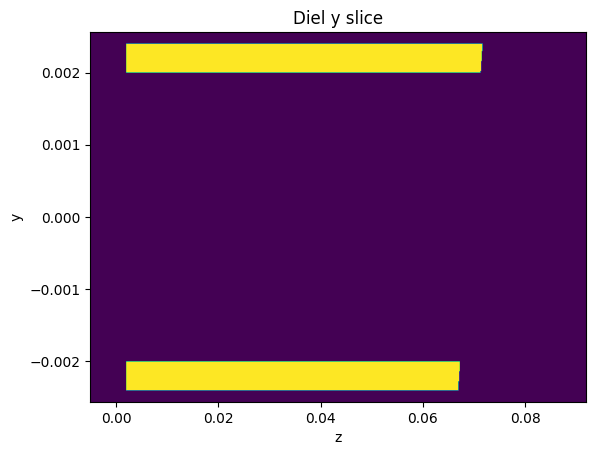

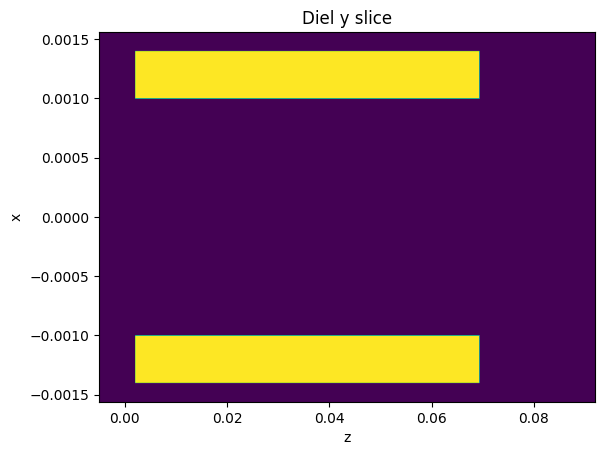

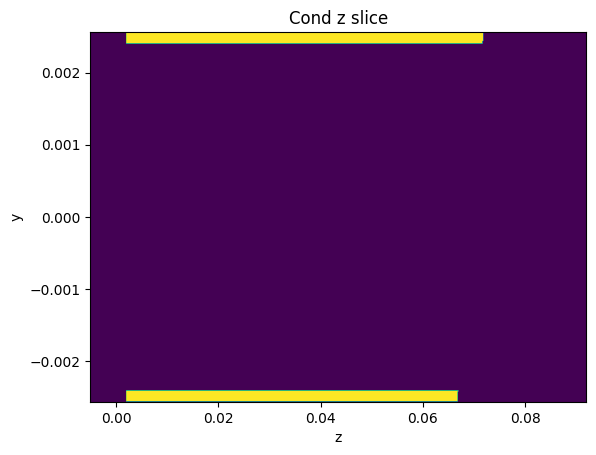

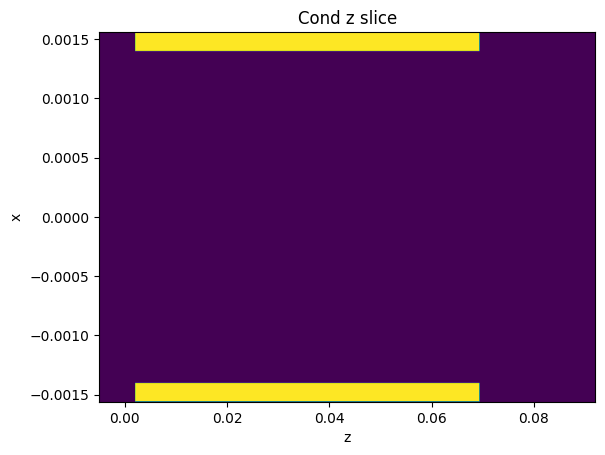

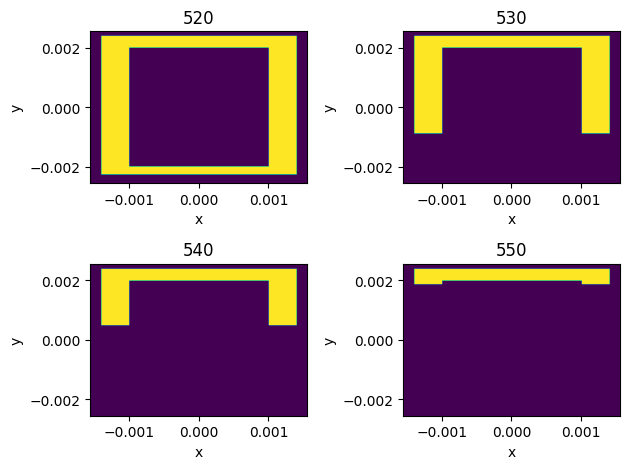

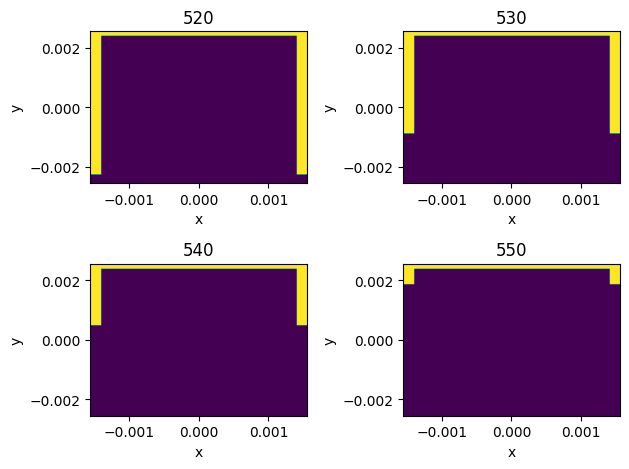

In [33]:
if is3d: 
   fig = go.Figure(data=go.Volume(
       x=xx.flatten(),
       y=yy.flatten(),
       z=zz.flatten(),
       value=eps1d.flatten(),
       isomin=0,
       isomax=np.max(eps1d),
       opacity=0.1, # needs to be small to see through all surfaces
       surface_count=11, # needs to be a large number for good volume rendering
       ))
   #plt.savefig(savedir + '3dfig.png')
   plt.show()
   
if not(is3d):
#   plt.subplot (2,1,1)
   plt.imshow(eps[:,int(Ny/2),:],extent=[bblo[2],bbhi[2],bblo[1],bbhi[1]],aspect='auto')
   plt.xlabel('z')
   plt.ylabel('y')
   plt.title('Diel y slice')
   plt.show()
   plt.close()
    #   plt.subplot (2,1,2)
   plt.imshow(eps[int(Nx/2),:,:],extent=[bblo[2],bbhi[2],bblo[0],bbhi[0]],aspect='auto')
   plt.xlabel('z')
   plt.ylabel('x')
   plt.title('Diel y slice')
   #plt.savefig(savedir + 'not3dfigeps.png')
   plt.show()
   plt.close()

#   plt.subplot(2,1,1)
   plt.imshow(sig[:,int(Ny/2),:],extent=[bblo[2],bbhi[2],bblo[1],bbhi[1]],aspect='auto')
   plt.xlabel('z')
   plt.ylabel('y')
   plt.title('Cond z slice')
   plt.show()
   plt.close()
#   plt.subplot(2,1,2)
   plt.imshow(sig[int(Nx/2),:,:],extent=[bblo[2],bbhi[2],bblo[0],bbhi[0]],aspect='auto')
   plt.xlabel('z')
   plt.ylabel('x')
   plt.title('Cond z slice')
   #plt.savefig(savedir+'not3dfigsig.png')
   plt.show()

slices = [520,530,540,550]


if deg45:
   fig,axs=plt.subplots(2,2)
   axs[0,0].imshow(eps[:,:,slices[0]],extent=[bblo[0],bbhi[0],bblo[1],bbhi[1]],aspect='auto')
   axs[0,0].set_title(str(slices[0]))
   axs[0,0].set_xlabel('x')
   axs[0,0].set_ylabel('y')

   axs[0,1].imshow(eps[:,:,slices[1]],extent=[bblo[0],bbhi[0],bblo[1],bbhi[1]],aspect='auto')
   axs[0,1].set_title(str(slices[1]))
   axs[0,1].set_xlabel('x')
   axs[0,1].set_ylabel('y')

   axs[1,0].imshow(eps[:,:,slices[2]],extent=[bblo[0],bbhi[0],bblo[1],bbhi[1]],aspect='auto')
   axs[1,0].set_title(str(slices[2]))
   axs[1,0].set_xlabel('x')
   axs[1,0].set_ylabel('y')

   axs[1,1].imshow(eps[:,:,slices[3]],extent=[bblo[0],bbhi[0],bblo[1],bbhi[1]],aspect='auto')
   axs[1,1].set_title(str(slices[3]))
   axs[1,1].set_xlabel('x')
   axs[1,1].set_ylabel('y')
   plt.tight_layout()
    #plt.savefig(savedir+'not3dfigepsz.png')
   plt.show()

   fig,axs=plt.subplots(2,2)
   axs[0,0].imshow(sig[:,:,slices[0]],extent=[bblo[0],bbhi[0],bblo[1],bbhi[1]],aspect='auto')
   axs[0,0].set_title(str(slices[0]))
   axs[0,0].set_xlabel('x')
   axs[0,0].set_ylabel('y')

   axs[0,1].imshow(sig[:,:,slices[1]],extent=[bblo[0],bbhi[0],bblo[1],bbhi[1]],aspect='auto')
   axs[0,1].set_title(str(slices[1]))
   axs[0,1].set_xlabel('x')
   axs[0,1].set_ylabel('y')

   axs[1,0].imshow(sig[:,:,slices[2]],extent=[bblo[0],bbhi[0],bblo[1],bbhi[1]],aspect='auto')
   axs[1,0].set_title(str(slices[2]))
   axs[1,0].set_xlabel('x')
   axs[1,0].set_ylabel('y')

   axs[1,1].imshow(sig[:,:,slices[3]],extent=[bblo[0],bbhi[0],bblo[1],bbhi[1]],aspect='auto')
   axs[1,1].set_title(str(slices[3]))
   axs[1,1].set_xlabel('x')
   axs[1,1].set_ylabel('y')
   plt.tight_layout()
   #plt.savefig(savedir+'not3dfigsigz.png')
   plt.show()